<a href="https://colab.research.google.com/github/ayushjaiswal13/Credit-Card-Fraud-Detection-/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPERATION

IMPORTING THE DEPENDENCIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve



Reading the file

In [ ]:
credit_card_data = pd.read_csv('/content/creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
63467,50729,-0.885149,0.685702,2.633474,-0.627847,-0.382435,-0.341406,0.412056,0.144234,-0.591181,...,0.139998,0.262089,-0.177035,0.567301,0.143500,0.273751,0.000619,0.063722,33.86,0.0
63468,50730,1.524481,-0.443952,-0.917431,-1.170535,0.196548,-0.104157,-0.219461,-0.107692,-1.174652,...,0.120102,0.212776,-0.381743,-1.365279,0.966568,0.006848,-0.040391,-0.027141,15.00,0.0
63469,50731,0.384574,-1.420667,0.895325,1.034192,-1.259366,0.563206,-0.266365,0.235659,0.679938,...,0.103934,-0.241229,-0.224265,0.293396,0.006356,0.334843,-0.043213,0.075555,368.90,0.0
63470,50731,-2.905183,2.331722,-1.051898,-0.078557,3.616107,-0.652025,4.420506,-5.210530,6.723739,...,-1.285569,-0.230240,-0.541085,-0.742582,0.018568,-0.863808,-1.438975,-2.156480,1.00,0.0
63471,50731,-0.289526,-1.037570,2.355009,-1.311061,-1.830279,0.209060,-1.256847,0.304098,-1.761717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So I'll mention some things about the data set which I can observe is first of all the very first column is the time that is the time when the transaction was made. Next is the v1 to v26 which ofcourse are some confidential params. The last columns talk abou the cost/amount that is the transaction made in USD, next is the fraudlent or not.

0 = Correct

1 = FRAUD


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63472 entries, 0 to 63471
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    63472 non-null  int64  
 1   V1      63472 non-null  float64
 2   V2      63472 non-null  float64
 3   V3      63472 non-null  float64
 4   V4      63472 non-null  float64
 5   V5      63472 non-null  float64
 6   V6      63472 non-null  float64
 7   V7      63472 non-null  float64
 8   V8      63472 non-null  float64
 9   V9      63472 non-null  float64
 10  V10     63471 non-null  float64
 11  V11     63471 non-null  float64
 12  V12     63471 non-null  float64
 13  V13     63471 non-null  float64
 14  V14     63471 non-null  float64
 15  V15     63471 non-null  float64
 16  V16     63471 non-null  float64
 17  V17     63471 non-null  float64
 18  V18     63471 non-null  float64
 19  V19     63471 non-null  float64
 20  V20     63471 non-null  float64
 21  V21     63471 non-null  float64
 22

Checking if any value is missing or not ?

In [ ]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


LUCKILY WE DONT HAVE ANY MISSING VALUES ELSE WE WOULD HAVE DONE **IMPUTATION** TO FIX THE DATA. BUT I GUESS THATS FOR SOME OTHER DAY.

In [ ]:
credit_card_data['Class'].value_counts()

,count
Class,
0.0,63306
1.0,165


This data is really unbalanced because more than 99% data is not fraud.

In [ ]:
#Seperating the data set
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(63306, 31)
(165, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,63306.000000
mean,96.084069
std,270.901083
min,0.000000
25%,7.680000
50%,26.270000
75%,87.985000
max,19656.530000


In [ ]:
fraud.Amount.describe()

,Amount
count,165.000000
mean,94.772182
std,223.636274
min,0.000000
25%,1.000000
50%,5.300000
75%,99.990000
max,1809.680000


In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,32886.268884,-0.222052,-0.025881,0.711575,0.157617,-0.252231,0.108458,-0.094471,0.051489,0.054956,...,0.047178,-0.030473,-0.107362,-0.038206,0.006238,0.136169,0.019903,0.000447,0.004078,96.084069
1.0,28970.593939,-7.031319,5.057975,-9.478683,5.499619,-5.201642,-2.141312,-7.386265,3.414395,-3.320945,...,0.421608,0.848637,-0.196178,-0.256211,-0.076312,0.237857,0.116940,0.563026,0.036893,94.772182


UNDER SAMPLING

Building a dataset which has similar distribution of transcations that is your dataset should have comparable % of both datas.



In [ ]:
legit_sample = legit.sample(492, random_state = 42)

concatinate both

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)


In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
53767,46136,-0.695470,-0.191192,0.795238,-1.867525,0.920020,0.186605,0.190043,0.087641,-1.047784,...,-0.023570,0.011518,-0.150745,-1.234054,0.014065,-0.419998,0.181778,-0.029501,43.56,0.0
29375,35446,-0.298098,0.728731,1.556115,1.472005,-0.385254,-0.013940,0.237548,0.272532,0.337727,...,0.053652,0.480423,0.028965,0.375514,-0.648514,-0.268755,0.486182,0.255637,15.00,0.0
59187,48735,-0.614180,1.378976,0.777603,1.055271,-0.330491,-0.982023,0.508784,0.061106,-0.824051,...,0.233601,0.620777,0.052589,0.764770,-0.125067,-0.375500,-0.291109,-0.008170,22.35,0.0
27830,34721,-0.470390,0.912921,2.211184,1.498263,-0.192559,0.179446,0.262032,0.198311,-0.628157,...,-0.159444,-0.319209,-0.226474,0.313738,0.150519,-0.275676,0.121154,0.080554,1.18,0.0
34491,37691,1.151504,-0.057313,1.278569,1.347716,-1.015167,-0.213326,-0.581533,0.108870,0.943783,...,-0.066131,-0.001357,-0.001819,0.368414,0.403381,-0.407274,0.070208,0.037542,9.99,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
58422,48380,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,0.609133,...,-0.392667,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958,208.58,1.0
58761,48533,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,...,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1.00,1.0
59539,48884,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1.0
61787,49985,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,...,0.493436,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,360.00,1.0
63421,50706,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1.0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,165


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,33012.109756,-0.342047,-0.143206,0.669775,0.002242,-0.290133,0.025758,-0.213625,0.088873,0.061175,...,0.010277,0.021713,-0.081650,-0.011822,0.008697,0.127374,-0.003484,0.009306,0.026691,94.447520
1.0,28970.593939,-7.031319,5.057975,-9.478683,5.499619,-5.201642,-2.141312,-7.386265,3.414395,-3.320945,...,0.421608,0.848637,-0.196178,-0.256211,-0.076312,0.237857,0.116940,0.563026,0.036893,94.772182


very important for us to do the above thinf because we need to know that the data which we are getting from the sample is not biased that is it should have almost the same values of mean and should not be very changed.

Next we will split the data into Features and Targets and then to training data and test data

In [ ]:
X = new_dataset.drop(columns='Class', axis = 1)
Y = new_dataset['Class']

print(X)

        Time        V1        V2         V3        V4        V5        V6  \
53767  46136 -0.695470 -0.191192   0.795238 -1.867525  0.920020  0.186605   
29375  35446 -0.298098  0.728731   1.556115  1.472005 -0.385254 -0.013940   
59187  48735 -0.614180  1.378976   0.777603  1.055271 -0.330491 -0.982023   
27830  34721 -0.470390  0.912921   2.211184  1.498263 -0.192559  0.179446   
34491  37691  1.151504 -0.057313   1.278569  1.347716 -1.015167 -0.213326   
...      ...       ...       ...        ...       ...       ...       ...   
58422  48380 -2.790771 -1.464269   1.031165  1.921356 -0.090014 -0.483871   
58761  48533  1.243848  0.524526  -0.538884  1.209196  0.479538 -0.197429   
59539  48884 -2.139051  1.394368  -0.612035  1.049327 -1.162102 -0.768219   
61787  49985 -1.554216  1.694229  -0.903334  2.425436 -2.899787  0.133028   
63421  50706 -8.461845  6.866198 -11.838269  4.194211 -6.923097 -3.221147   

             V7        V8        V9  ...       V20       V21       V22  \
5

In [ ]:
print(Y)

53767    0.0
29375    0.0
59187    0.0
27830    0.0
34491    0.0
        ... 
58422    1.0
58761    1.0
59539    1.0
61787    1.0
63421    1.0
Name: Class, Length: 657, dtype: float64


Great !!

Now split it into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state =2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(657, 30) (525, 30) (132, 30)


#Defining Ploting

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {title}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(model, Y_test, X_test_pred, title):
    fpr, tpr, _ = roc_curve( Y_test, X_test_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {title}")
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, Y_test, X_test_pred, title):
    precision, recall, _ = precision_recall_curve(Y_test, X_test_pred)

    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"Precision-Recall Curve for {title}")
    plt.show()

# MODEL TRAINING - Logistic Regression

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
logistic_regression = LogisticRegression(max_iter = 500)


In [186]:
logistic_regression.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

Accuracy Score

In [187]:
X_train_prediction = logistic_regression.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print(training_data_accuracy)

0.979047619047619


In [188]:
# accuracy on test data
X_test_prediction = logistic_regression.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(test_data_accuracy)

0.9393939393939394


In [ ]:
report = classification_report(Y_test, X_test_prediction)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        99
         1.0       0.90      0.85      0.88        33

    accuracy                           0.94       132
   macro avg       0.93      0.91      0.92       132
weighted avg       0.94      0.94      0.94       132



CONFUSION MATRIX

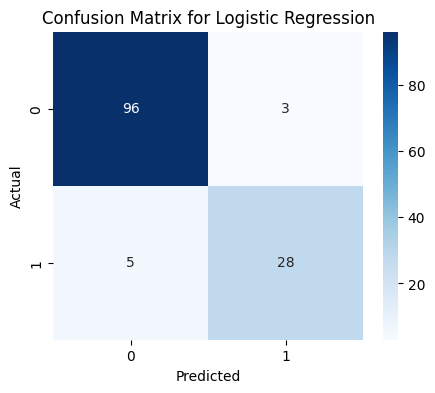

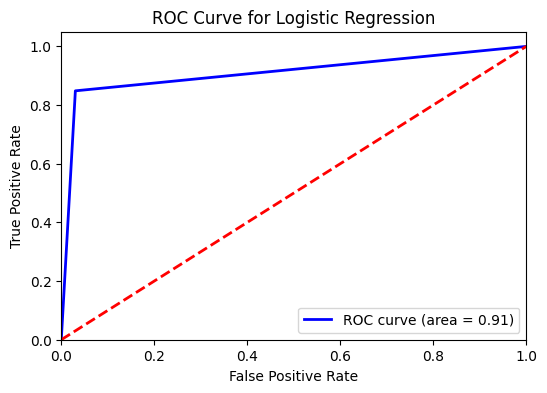

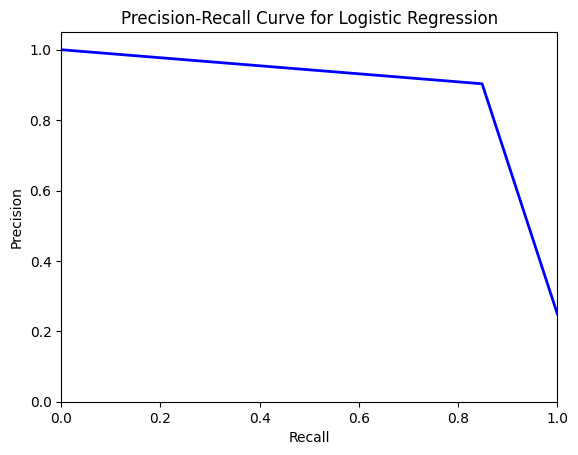

In [189]:
plot_confusion_matrix(Y_test, X_test_prediction, "Logistic Regression")
plot_roc_curve(logistic_regression, Y_test, X_test_prediction, "Logistic Regression")
plot_precision_recall_curve(logistic_regression, Y_test, X_test_prediction, "Logistic Regression")

# MODEL TRAINING - Decision Trees

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
decision_tree.fit(X_train, Y_train)
y_pred_dt = decision_tree.predict(X_train)

In [ ]:
data_accuracy = accuracy_score(y_pred_dt, Y_train)

In [ ]:
print(data_accuracy)

1.0


In [ ]:
y_pred_dt = decision_tree.predict(X_test)
data_accuracy = accuracy_score(y_pred_dt, Y_test)
print(data_accuracy)

0.9242424242424242


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        99
         1.0       0.85      0.85      0.85        33

    accuracy                           0.92       132
   macro avg       0.90      0.90      0.90       132
weighted avg       0.92      0.92      0.92       132

Accuracy: 0.9242424242424242


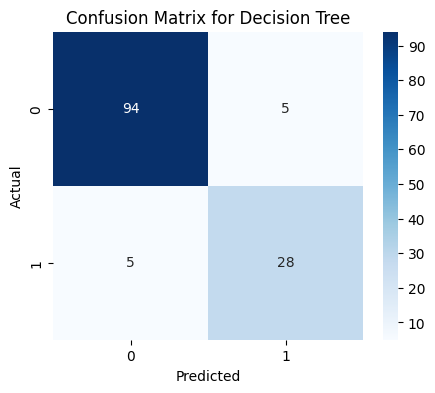

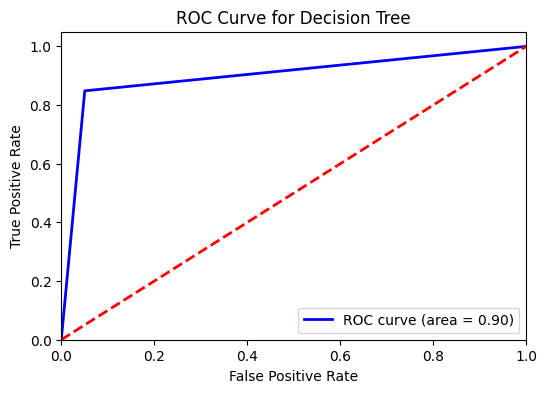

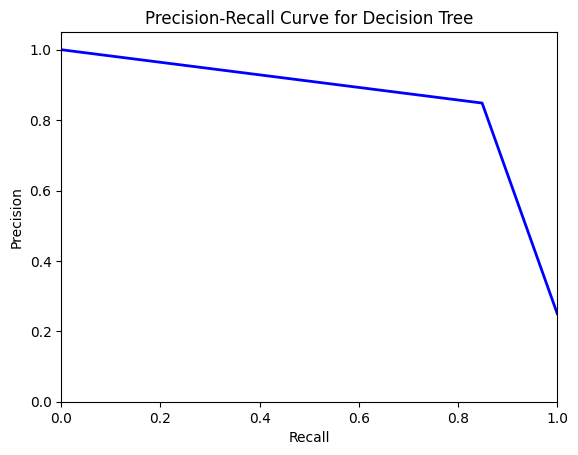

In [ ]:
print(classification_report(Y_test, y_pred_dt))
print("Accuracy:", accuracy_score(Y_test, y_pred_dt))
plot_confusion_matrix(Y_test, y_pred_dt, "Decision Tree")
plot_roc_curve(decision_tree, Y_test, y_pred_dt, "Decision Tree")
plot_precision_recall_curve(decision_tree, Y_test, y_pred_dt, "Decision Tree")

# MODEL TRAINING - Random Forest

In [210]:
random_forest = RandomForestClassifier(random_state=42, max_depth = 2)
random_forest.fit(X_train, Y_train)
y_pred_rf = random_forest.predict(X_test)


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        99
         1.0       1.00      0.82      0.90        33

    accuracy                           0.95       132
   macro avg       0.97      0.91      0.94       132
weighted avg       0.96      0.95      0.95       132

Accuracy: 0.9545454545454546


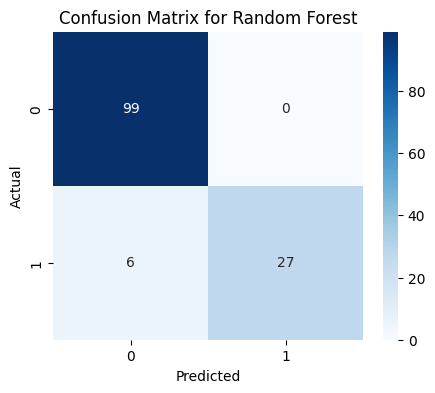

In [211]:
print(classification_report(Y_test, y_pred_rf))
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
plot_confusion_matrix(Y_test, y_pred_rf, "Random Forest")


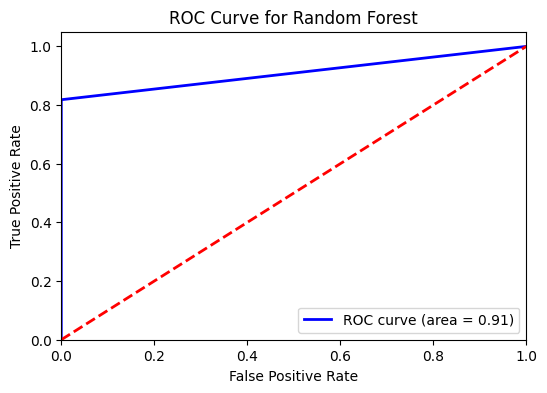

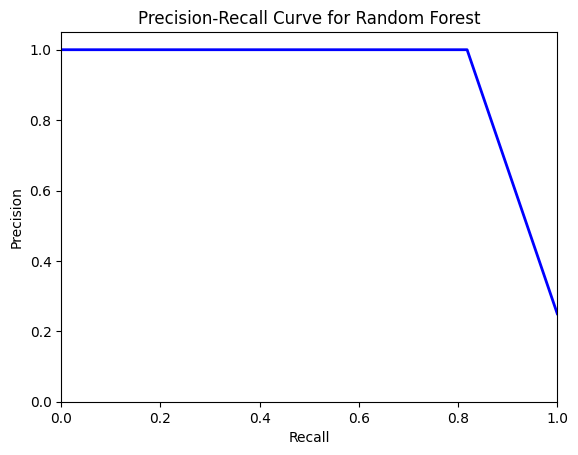

In [212]:
plot_roc_curve(random_forest,Y_test, y_pred_rf, "Random Forest")
plot_precision_recall_curve(random_forest, Y_test, y_pred_rf,"Random Forest")


# Model Training - KNN

In [213]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

In [214]:
print(classification_report(Y_test, y_pred_knn))
print("Accuracy:", accuracy_score(Y_test, y_pred_knn))


              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89        99
         1.0       0.74      0.42      0.54        33

    accuracy                           0.82       132
   macro avg       0.78      0.69      0.71       132
weighted avg       0.81      0.82      0.80       132

Accuracy: 0.8181818181818182


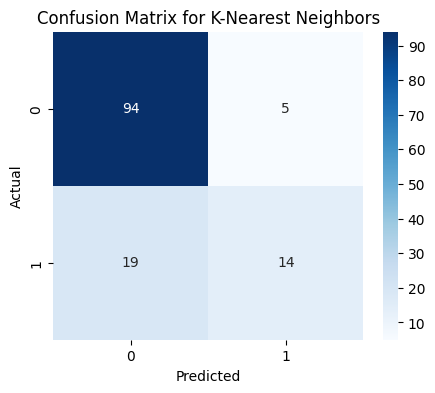

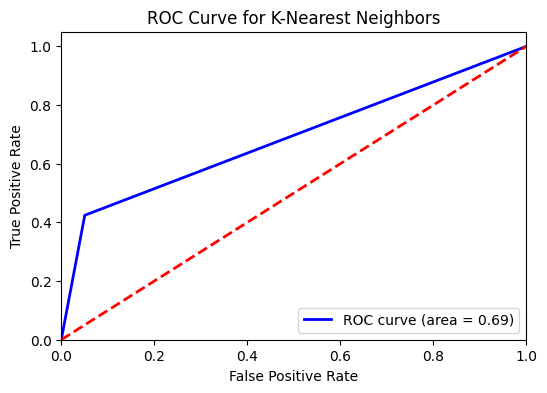

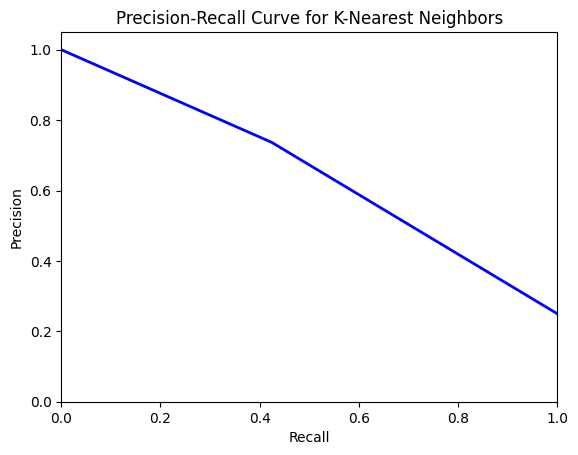

In [215]:
plot_confusion_matrix(Y_test, y_pred_knn, "K-Nearest Neighbors")
plot_roc_curve(knn, Y_test, y_pred_knn, "K-Nearest Neighbors")
plot_precision_recall_curve(knn, Y_test, y_pred_knn, "K-Nearest Neighbors")

# MODEL TRAINING - Naive Bayes

In [216]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,Y_train)
y_pred_nb = naive_bayes.predict(X_test)

In [217]:
print(classification_report(Y_test, y_pred_nb))
print("Accuracy:", accuracy_score(Y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97        99
         1.0       0.96      0.82      0.89        33

    accuracy                           0.95       132
   macro avg       0.95      0.90      0.93       132
weighted avg       0.95      0.95      0.95       132

Accuracy: 0.946969696969697


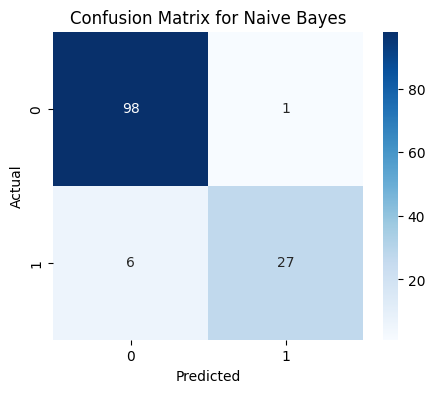

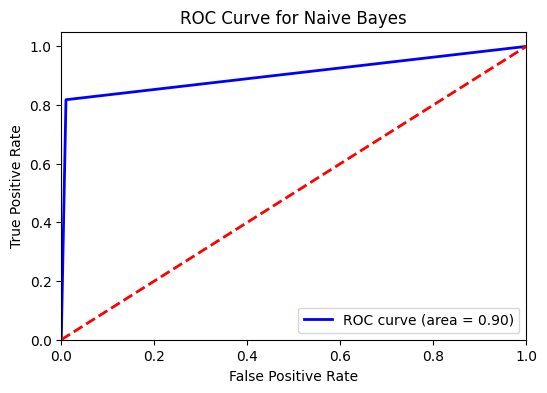

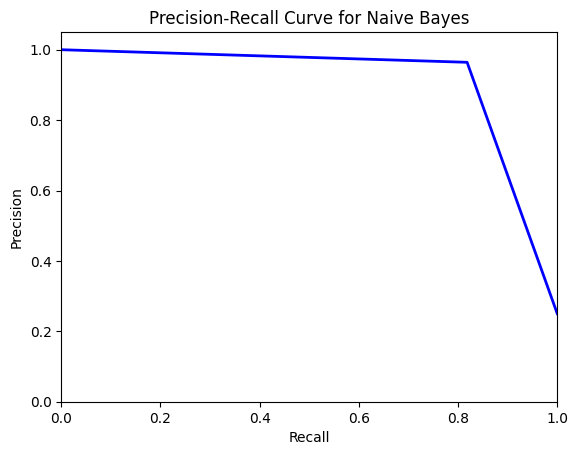

In [218]:
plot_confusion_matrix(Y_test, y_pred_nb, "Naive Bayes")
plot_roc_curve(naive_bayes, Y_test, y_pred_nb, "Naive Bayes")
plot_precision_recall_curve(naive_bayes,Y_test, y_pred_nb, "Naive Bayes")

# Cumulative Results ::

##ROC CURVE

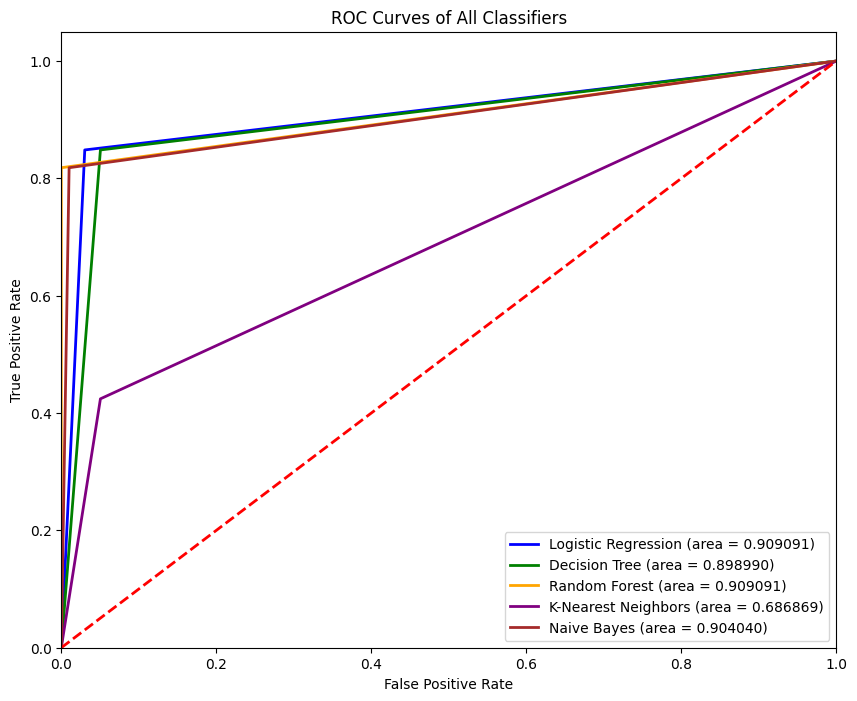

In [219]:
colors = ['blue', 'green', 'orange', 'purple', 'brown']
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes']

# ROC Cumulative Curve Plot
plt.figure(figsize=(10, 8))
for idx, (model, name) in enumerate([(logistic_regression, 'Logistic Regression'),
                                      (decision_tree, 'Decision Tree'),
                                      (random_forest, 'Random Forest'),
                                      (knn, 'K-Nearest Neighbors'),
                                      (naive_bayes, 'Naive Bayes')]):
    #y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(Y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[idx], lw=2, label=f'{name} (area = {roc_auc:.6f})')

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of All Classifiers')
plt.legend(loc="lower right")
plt.show()


##PRECISION-RECALL CURVE

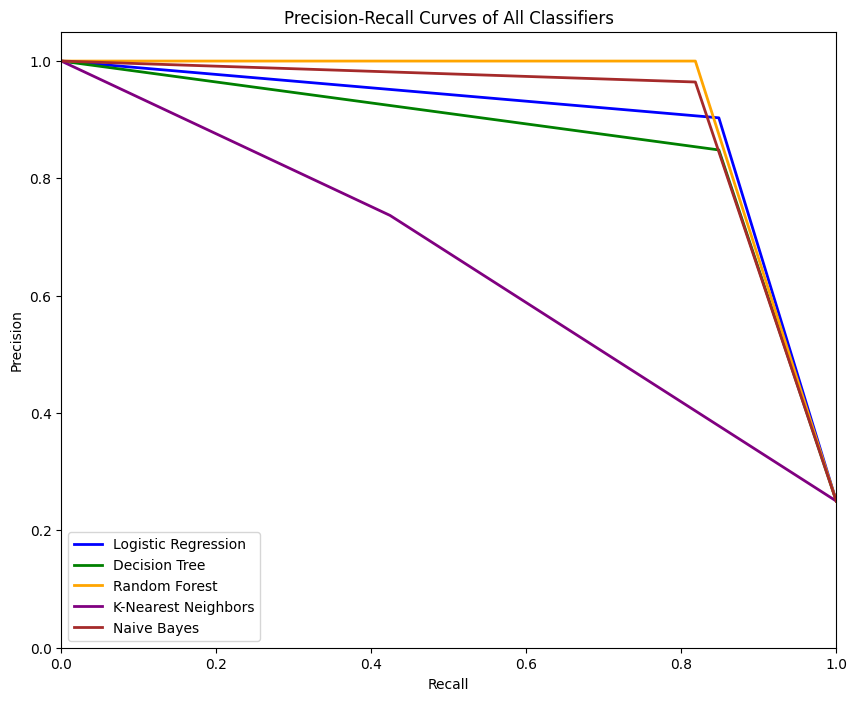

In [220]:
plt.figure(figsize=(10, 8))
for idx, (model, name) in enumerate([(logistic_regression, 'Logistic Regression'),
                                      (decision_tree, 'Decision Tree'),
                                      (random_forest, 'Random Forest'),
                                      (knn, 'K-Nearest Neighbors'),
                                      (naive_bayes, 'Naive Bayes')]):
    y_pred_prob = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(Y_test, y_pred_prob)
    plt.plot(recall, precision, color=colors[idx], lw=2, label=f'{name}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves of All Classifiers')
plt.legend(loc="lower left")
plt.show()
